# Quantitative methods - K-MEANS - group 5 presentation code

### IMPORT PACKAGES
Import required packages

In [1]:
#data manipulation
import pandas as pd
import numpy as np

#k-means
import numpy as np
import sklearn.cluster as sklc

#hiearchical clustering
import numpy as np
import scipy.cluster.hierarchy as spch

#silluete scores
import sklearn.metrics as sklm

#dendrogram
import matplotlib.pyplot as plt
import sklearn.metrics as sklm
import scipy.cluster.hierarchy as spch

#final plots
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

#scaling 
from sklearn import preprocessing

#current time
import datetime


%matplotlib inline

### IMPORT DATA
Import full table and select features

In [2]:
#full dataset

df_path = "/Users/antonios/Documents/Dropbox/Public/QM_Group_Presentation/NHS clusters/1. Data/CSVs/QM_Group_5_STP_Data.csv"

df_NHS_full = pd.read_csv(df_path)
df_NHS_full = df_NHS_full.set_index("Area_name")
df_NHS_full.head()

,Area_code,Patient count,CV_AF,CV_CHD,CV_CVD,CV_HF,CV_LVSD,CV_HYP,CV_PAD,CV_STIA,...,HD_CKD,HD_DM,HD_PC,Neu_DEM,Neu_DEP,Neu_EP,Neu_LD,Neu_MH,MS_OST,MS_RA
Area_name,,,,,,,,,,,,,,,,,,,,,
WEST YORKSHIRE STP,E54000005,"2,710,486",0.017530,0.033269,0.011364,0.007996,NaN,0.135138,0.006777,0.018056,...,0.038359,0.070256,0.003941,0.007557,0.104067,0.008438,0.005647,0.009517,0.005943,0.007371
"HUMBER, COAST AND VALE STP",E54000006,"1,428,962",0.022570,0.040518,0.012420,0.008486,NaN,0.155717,0.007130,0.020714,...,0.044293,0.070110,0.003274,0.008516,0.094997,0.009300,0.004699,0.008069,0.004915,0.008539
GREATER MANCHESTER STP,E54000007,"3,044,238",0.016898,0.032779,0.011504,0.008936,NaN,0.135521,0.007432,0.017775,...,0.038841,0.071991,0.004023,0.007317,0.113701,0.008975,0.005146,0.010423,0.005948,0.006895
CHESHIRE AND MERSEYSIDE STP,E54000008,"2,620,326",0.023235,0.037414,0.013089,0.010488,NaN,0.153691,0.008175,0.020313,...,0.048123,0.068995,0.004547,0.008390,0.118263,0.009542,0.005292,0.010865,0.007024,0.008190
SOUTH YORKSHIRE AND BASSETLAW STP,E54000009,"1,574,811",0.020883,0.037363,0.011053,0.010077,NaN,0.144359,0.007403,0.020341,...,0.046828,0.071637,0.004116,0.008624,0.108962,0.009298,0.006038,0.008666,0.004553,0.007600


#### SAMPLE DATA
Sub-select relevant columns

In [3]:
#ADD COLUMN NAMES OF WANTED VARIABLES HERE
wanted_variables = ["CV_HYP","LS_OB","HD_CAN","Neu_DEP","Neu_MH","Resp_AST"]

df_NHS_sample = df_NHS_full[wanted_variables]
df_NHS_transform = df_NHS_full[wanted_variables]

df_NHS_sample.head()

#Transform to multiply all % by 100
for column in wanted_variables:
    df_NHS_transform.loc[:,column] = (df_NHS_sample.loc[:,column]*100).copy()

df_NHS_transform.columns = ["Hypertension","Obesity","Cancer","Depression","Mental health","Asthma"]
df_NHS_transform.index.name = "Area name"
    
df_NHS_transform.describe()

/Users/antonios/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,Hypertension,Obesity,Cancer,Depression,Mental health,Asthma
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,14.245036,9.794524,2.852103,10.007908,0.912965,6.040094
std,1.650992,1.722609,0.521830,1.444589,0.123327,0.668985
min,10.560932,5.820715,1.525505,6.384569,0.722217,4.389151
25%,13.162746,8.540744,2.569907,9.333540,0.817965,5.807491
50%,14.423130,9.717108,2.951305,10.027425,0.867090,6.265985
75%,15.520476,11.150265,3.200263,10.915953,0.996901,6.502184
max,16.600187,13.272109,3.840752,12.820154,1.267849,6.878169


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a166f7490>,
      dtype=object)

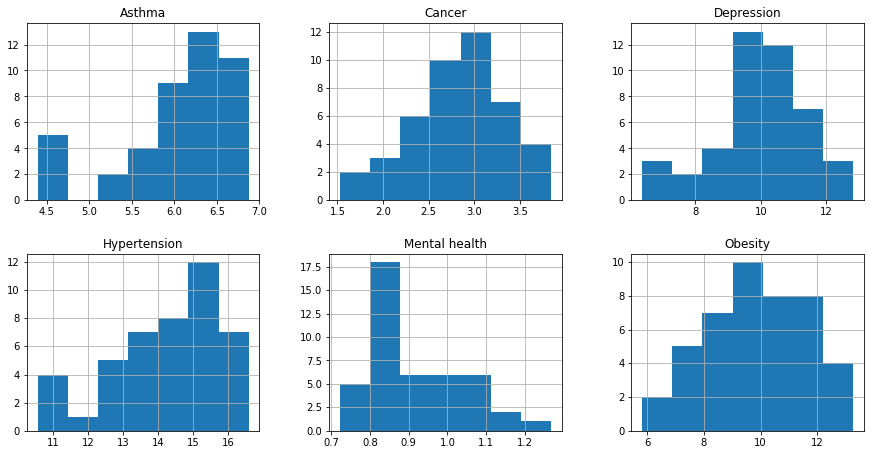

In [4]:
hist_columns = ["Hypertension","Obesity","Cancer","Depression","Mental health","Asthma"]
df_NHS_transform.loc[:,hist_columns].hist(figsize = (15,7.5),layout = (2,3),bins = 7)

In [8]:
from scipy import stats

for column in df_NHS_transform.columns:
    stats_test = df_NHS_transform[column]
    k2, p = stats.normaltest(stats_test)
    print("\n-----------------------------------------------------")
    print(column,": Chi squared:",k2)
    print(column,": P-value",p)
    alpha = 0.05
    
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")
    print("-----------------------------------------------------")



-----------------------------------------------------
Hypertension : Chi squared: 3.3847126097191422
Hypertension : P-value 0.1840852515819447
The null hypothesis cannot be rejected
-----------------------------------------------------

-----------------------------------------------------
Obesity : Chi squared: 0.39356205930385246
Obesity : P-value 0.821370469400136
The null hypothesis cannot be rejected
-----------------------------------------------------

-----------------------------------------------------
Cancer : Chi squared: 1.6804566127927147
Cancer : P-value 0.4316119724055487
The null hypothesis cannot be rejected
-----------------------------------------------------

-----------------------------------------------------
Depression : Chi squared: 2.1460678600958794
Depression : P-value 0.3419694306263744
The null hypothesis cannot be rejected
-----------------------------------------------------

-----------------------------------------------------
Mental health : Chi squ

In [10]:
#Scaling code from: https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

# Get column names first
names = df_NHS_transform.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
df_NHS_scaled = scaler.fit_transform(df_NHS_transform)
df_NHS_scaled = pd.DataFrame(df_NHS_scaled, columns=names)

df_NHS_scaled.set_index(df_NHS_transform.index, inplace = True)
df_NHS_scaled.head()

,Hypertension,Obesity,Cancer,Depression,Mental health,Asthma
Area name,,,,,,
WEST YORKSHIRE STP,-0.448042,0.801245,-0.508483,0.279284,0.317505,0.486241
"HUMBER, COAST AND VALE STP",0.812860,0.865889,0.633591,-0.355897,-0.869572,0.518328
GREATER MANCHESTER STP,-0.424545,0.359973,-0.798182,0.953832,1.060551,0.552939
CHESHIRE AND MERSEYSIDE STP,0.688701,0.794421,0.371492,1.273283,1.423437,0.389044
SOUTH YORKSHIRE AND BASSETLAW STP,0.116937,1.460910,-0.417069,0.621999,-0.380461,0.319346


#### VISUALISE DATA

In [11]:
#Function to take in any dataframe with only numerical columns
file_count = 0

def f_plot(dataframe):
    sns_plot = sns.pairplot(dataframe, height=3, aspect=1.5)
    
    global file_count
    file_count = file_count +1
    
    fig = sns_plot.fig
    fig.savefig(f"K_means_plot_{file_count}_output.png")
    

In [12]:
#f_plot(df_NHS_transform)

### CLUSTERING

#### K-MEANS

In [13]:
###SET UP DATA 

#Create dataframe with only the columns on which we are doing our cluster analysis
df_k_means_analyse = df_NHS_scaled
df_k_means_master = df_NHS_scaled
df_k_means_analyse.head()

,Hypertension,Obesity,Cancer,Depression,Mental health,Asthma
Area name,,,,,,
WEST YORKSHIRE STP,-0.448042,0.801245,-0.508483,0.279284,0.317505,0.486241
"HUMBER, COAST AND VALE STP",0.812860,0.865889,0.633591,-0.355897,-0.869572,0.518328
GREATER MANCHESTER STP,-0.424545,0.359973,-0.798182,0.953832,1.060551,0.552939
CHESHIRE AND MERSEYSIDE STP,0.688701,0.794421,0.371492,1.273283,1.423437,0.389044
SOUTH YORKSHIRE AND BASSETLAW STP,0.116937,1.460910,-0.417069,0.621999,-0.380461,0.319346


In [14]:
#SET UP FUNCTION

# Set range of k values:

k_max = 25 #max number of k clusters that affects number up to which tests will go

k_range = range(1,k_max)

# Create (almost) empty lists to store the output:
# (Cluster Allocations, SSE, Centroids, Silhouette scores)

# (Almost) empty, because we start with one piece of missing data in position zero.
# This is the data for zero clusters (i.e. an impossible case), and it means that the...
# ... indices of the elements will match the number of clusters that they refer to:

cluster_ids_series = [np.nan]
cluster_sse_series = [np.nan]
cluster_cns_series = [np.nan]
cluster_shs_series = [np.nan]

# Loop through k values:

for k in k_range:
    
    # Perform k means as before:
    
    km_output = sklc.KMeans(n_clusters = k, n_init = 20).fit(df_k_means_analyse)

    # Add the results to our lists:
    
    cluster_ids_series.append(km_output.labels_)
    cluster_sse_series.append(km_output.inertia_)
    cluster_cns_series.append(km_output.cluster_centers_)
    
    # Only add silhouettes if there is no error, since silhouettes cannot be calculated when, e.g...
    # ... there is only one cluster or where some points are in their own clusters:
    
    try:
        cluster_shs_series.append(sklm.silhouette_score(df_k_means_analyse,km_output.labels_))
    except:
        cluster_shs_series.append(0)

# Build a dictionary of the quantities we need to report on and convert to a dataframe.
# Also drop rows with missing data:
report_dict = {'SSE':cluster_sse_series,'Silhouette Score':cluster_shs_series}
report_df   = pd.DataFrame(report_dict,index=range(k_max))
report_df   = report_df.dropna(how='any')

# Find and report the optimal values of k and r:

optimal_k_by_silhouette_score = report_df['Silhouette Score'].argmax()
optimal_silhouette_score      = report_df.loc[optimal_k_by_silhouette_score,'Silhouette Score']

print('The optimal number of clusters, as determined by silhouette analysis, is ' + str(optimal_k_by_silhouette_score) + ".")
print('The silhouette score for ' + str(optimal_k_by_silhouette_score) + " clusters is " + str(optimal_silhouette_score) + ".")

#show dataframe
#report_df

# We will add the optimal cluster ids to the main dataframe:

optimal_cluster_ids = cluster_ids_series[optimal_k_by_silhouette_score]
df_k_means_master['optimal_kmeans_cluster_ids'] = optimal_cluster_ids

The optimal number of clusters, as determined by silhouette analysis, is 2.
The silhouette score for 2 clusters is 0.5399797033855835.


/Users/antonios/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


In [15]:
report_df['Silhouette Score']

1     0.000000
2     0.539980
3     0.332306
4     0.314850
5     0.307931
6     0.295257
7     0.257346
8     0.240674
9     0.271165
10    0.272132
11    0.233039
12    0.218410
13    0.212653
14    0.230106
15    0.227964
16    0.213443
17    0.188169
18    0.216131
19    0.223821
20    0.233619
21    0.215342
22    0.195301
23    0.201364
24    0.182691
Name: Silhouette Score, dtype: float64

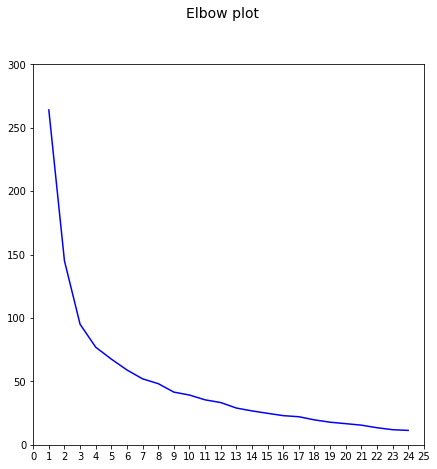

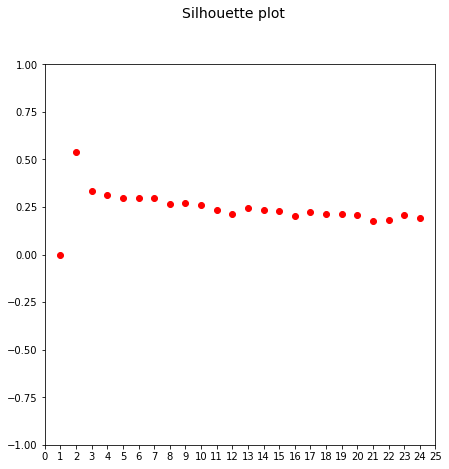

In [10]:

# Again, for the sake of interest, let's create an elbow plot and a silhouette plot:

fignum = 20
plt.figure(fignum,figsize = (7,7))
plt.plot(report_df.index,report_df['SSE'],'b-')

#plt.gca().set_aspect('equal')
plt.gca().set_xlim([0,k_max])
plt.gca().set_xticks(range(k_max+1))
plt.gca().set_ylim([0,300])

plt.savefig('elbow_plot' + str(fignum) +'.png')

plt.suptitle('Elbow plot', fontsize=14, va = "center")
plt.show()

fignum = 21
plt.figure(fignum,figsize = (7,7))
plt.plot(report_df.index,report_df['Silhouette Score'],'ro')

plt.gca().set_xlim([0,k_max])
plt.gca().set_xticks(range(k_max+1))
plt.gca().set_ylim([-1,1])

plt.suptitle('Silhouette plot', fontsize=14, va = "center")

plt.savefig('silhouette_plot' + str(fignum) +'.png')
plt.show()

In [11]:
#Add cluster IDs to the dataframe

# Take the relevant standardised data from the dataframe you created in Q2:

# Choose number of clusters, e.g.:

k = optimal_k_by_silhouette_score

print(k)

# Perform k-means 20 times, returning the best results as an output object:
kmeans_output = sklc.KMeans(n_clusters=k, n_init=20).fit(df_k_means_analyse)

# Ask the output object for the information you need:

q6_cluster_ids = kmeans_output.labels_
q6_cluster_sse = kmeans_output.inertia_
q6_cluster_cns = kmeans_output.cluster_centers_

# Add the cluster ids to the dataframe:

df_k_means_master['cluster_ids_kmeans'] = q6_cluster_ids
df_k_means_master.head()

2


,Hypertension,Obesity,Cancer,Depression,Mental health,Asthma,optimal_kmeans_cluster_ids,cluster_ids_kmeans
Area name,,,,,,,,
WEST YORKSHIRE STP,-0.448042,0.801245,-0.508483,0.279284,0.317505,0.486241,0,1
"HUMBER, COAST AND VALE STP",0.812860,0.865889,0.633591,-0.355897,-0.869572,0.518328,0,1
GREATER MANCHESTER STP,-0.424545,0.359973,-0.798182,0.953832,1.060551,0.552939,0,1
CHESHIRE AND MERSEYSIDE STP,0.688701,0.794421,0.371492,1.273283,1.423437,0.389044,0,1
SOUTH YORKSHIRE AND BASSETLAW STP,0.116937,1.460910,-0.417069,0.621999,-0.380461,0.319346,0,1


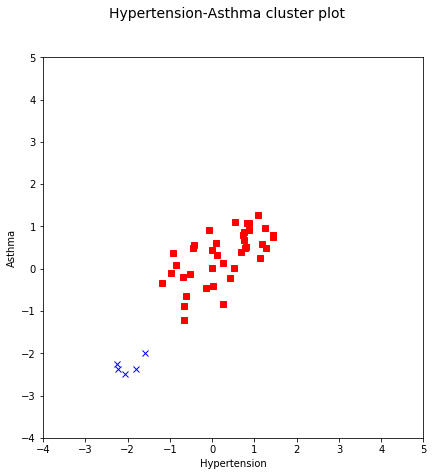

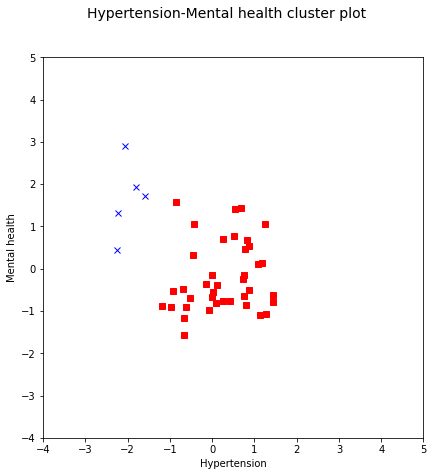

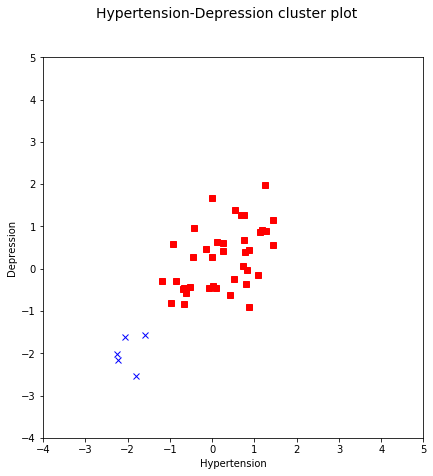

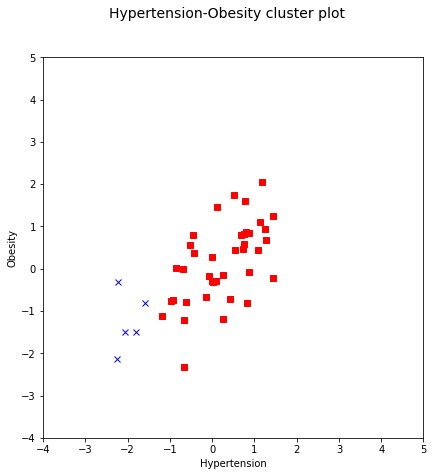

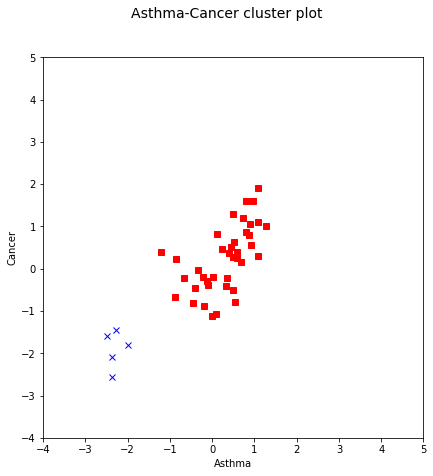

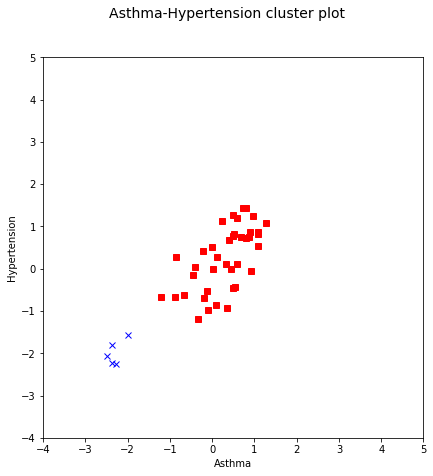

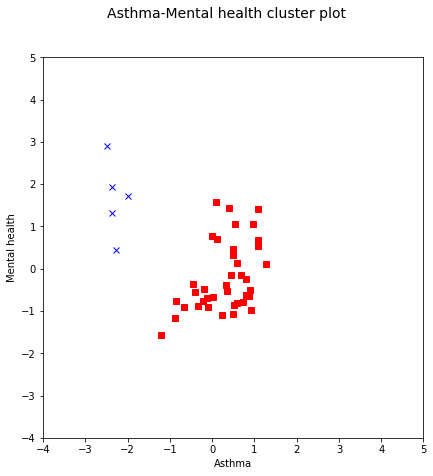

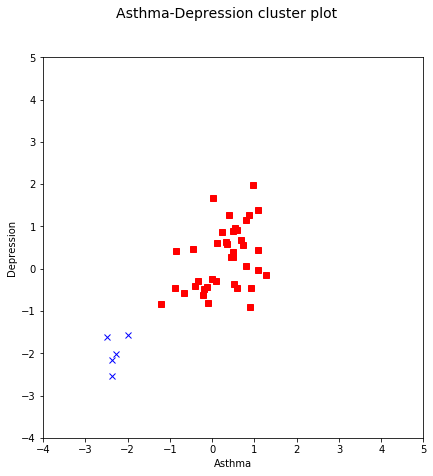

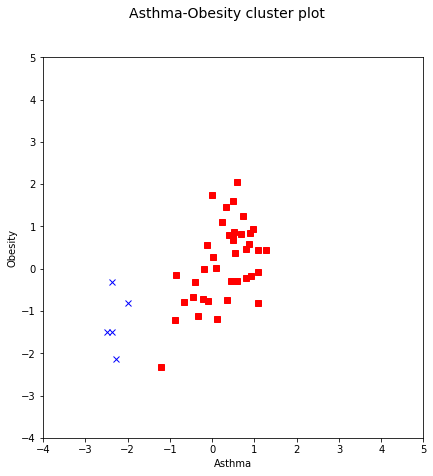

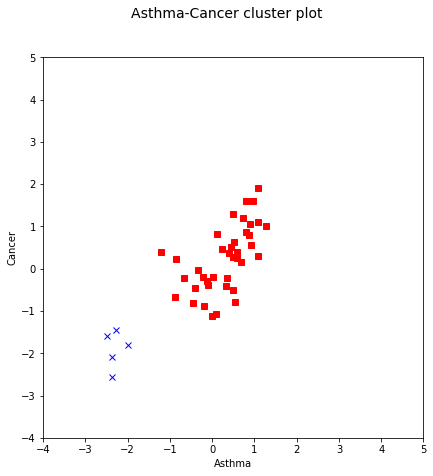

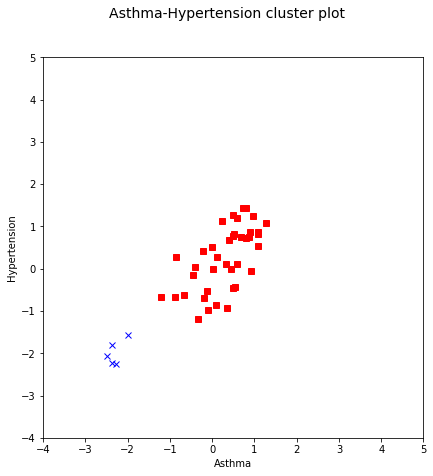

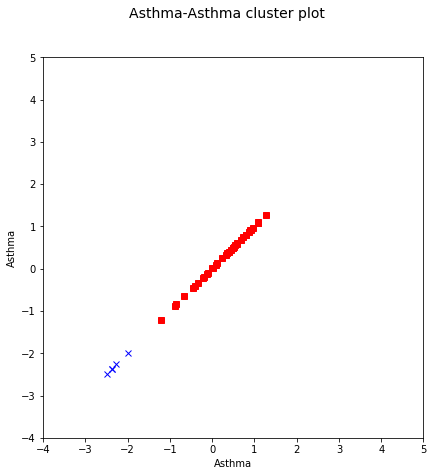

In [12]:
# ... let's visualise these clusters in 2D plots, taking two variables at a time.

colours = ["b","r",'b','g','m','k','c','y'] * 12
icons   = ["x",'s','x','s','.','v','^','<','>','*','+','D','d'] * 7

# k variable defined in previous cell

def plot_clusters_for_two_variables(data,data_clusters,var1,var2,fignum):

    plt.figure(fignum,figsize = (7,7))

    for i in range(k):
        
        plt.figure(fignum)
        data_this_cluster = data[data_clusters==i]
        
        plt.plot(data_this_cluster[var1],data_this_cluster[var2],colours[i] + icons[i])

        plt.gca().set_aspect('equal')
        plt.gca().set_xlim([-4,5])
        plt.gca().set_ylim([-4,5])

        
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.suptitle(f"{var1}-{var2} cluster plot", size = 14)
    plt.savefig('clusters_' + str(fignum) +'.png')
        
    plt.savefig('clusters_' + str(fignum) +'.png')

    plt.show()
    
cluster_ids = df_k_means_master['cluster_ids_kmeans']

#call function above to plot 

#COLUMN NAMES: CV_HYP	Resp_AST	LS_OB	HD_CAN	Neu_DEP	Neu_MH



plot_clusters_for_two_variables(df_k_means_master,cluster_ids,'Hypertension','Asthma',10)
plot_clusters_for_two_variables(df_k_means_master,cluster_ids,'Hypertension','Mental health',11)

plot_clusters_for_two_variables(df_k_means_master,cluster_ids,'Hypertension','Depression',12)
plot_clusters_for_two_variables(df_k_means_master,cluster_ids,'Hypertension','Obesity',13)

plot_clusters_for_two_variables(df_k_means_master,cluster_ids,'Asthma','Cancer',14)
plot_clusters_for_two_variables(df_k_means_master,cluster_ids,'Asthma','Hypertension',15)
############################

plot_clusters_for_two_variables(df_k_means_master,cluster_ids,'Asthma','Mental health',16)

plot_clusters_for_two_variables(df_k_means_master,cluster_ids,'Asthma','Depression',17)
plot_clusters_for_two_variables(df_k_means_master,cluster_ids,'Asthma','Obesity',18)

plot_clusters_for_two_variables(df_k_means_master,cluster_ids,'Asthma','Cancer',19)
plot_clusters_for_two_variables(df_k_means_master,cluster_ids,'Asthma','Hypertension',20)
plot_clusters_for_two_variables(df_k_means_master,cluster_ids,'Asthma','Asthma',21)



In [13]:
# e.g. for kmeans:

# Create an empty list for the separate dataframes:

separate_cluster_dataframes = []

# Create a list of the cluster id numbers:

clusters = range(df_k_means_master['optimal_kmeans_cluster_ids'].max() + 1)

# For each cluster, take a reduced version of the main dataframe, filtered to contain only that cluster. 

for i in clusters:
    separate_cluster_dataframes.append(df_k_means_master[df_k_means_master['optimal_kmeans_cluster_ids'] == i])

# Create summary stats dataframes for each cluster:
    
separate_cluster_summary_stats = []

for i in clusters:
    separate_cluster_summary_stats.append(separate_cluster_dataframes[i].describe())

### SUMMARY STATISTICS BY CLUSTER

### CLUSTER 1

In [14]:
#separate_cluster_summary_stats[0]
#df_k_means_master[df_k_means_master['optimal_kmeans_cluster_ids'] == 0]

cluster_0_areas = df_k_means_master[df_k_means_master['optimal_kmeans_cluster_ids'] == 0].index
cluster_0_data = df_NHS_transform.loc[cluster_0_areas,:]

cluster_0_data.describe()

,Hypertension,Obesity,Cancer,Depression,Mental health,Asthma
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,14.659963,10.067193,2.977819,10.370856,0.886981,6.235037
std,1.227229,1.592909,0.399839,1.066218,0.099210,0.401956
min,12.306925,5.820715,2.273070,8.725139,0.722217,5.237761
25%,13.532951,8.970802,2.676534,9.407543,0.815397,5.969850
50%,14.682241,10.246479,2.996502,10.406747,0.852009,6.329892
75%,15.579766,11.166555,3.268748,11.109240,0.960651,6.547431
max,16.600187,13.272109,3.840752,12.820154,1.106285,6.878169


### CLUSTER 1

In [15]:
cluster_1_areas = df_k_means_master[df_k_means_master['optimal_kmeans_cluster_ids'] == 1].index
cluster_1_data = df_NHS_transform.loc[cluster_1_areas,:]
cluster_1_data

,Hypertension,Obesity,Cancer,Depression,Mental health,Asthma
Area name,,,,,,
NORTH WEST LONDON STP,11.307605,7.256099,1.774493,6.384569,1.147812,4.474128
NORTH CENTRAL LONDON STP,10.891937,7.256698,2.033334,7.706745,1.267849,4.389151
NORTH EAST LONDON STP,10.616230,9.257070,1.525505,6.912117,1.073748,4.472412
SOUTH EAST LONDON STP,11.666318,8.402993,1.925375,7.762141,1.122379,4.720247
SOUTH WEST LONDON STP,10.560932,6.165639,2.098862,7.118969,0.966410,4.541747


### SAVE DATA

In [16]:
#Current time
time_now = datetime.datetime.now()

#Cluster_0_data
#cluster_0_data.to_csv((f"Cluster_0_{time_now.year}{time_now.month}{time_now.day}_{time_now.hour}{time_now.minute}.csv"))

#Cluster_1_data
#cluster_1_data.to_csv((f"Cluster_1_{time_now.year}{time_now.month}{time_now.day}_{time_now.hour}{time_now.minute}.csv"))